<a href="https://colab.research.google.com/github/DaniNar2/ABEC/blob/main/Prova_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importazione delle librerie necessarie

import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [ ]:
# Montaggio di Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caricamento delle etichette delle emozioni

dataset_path = '/content/drive/MyDrive/ABEC/PROVA DATASET'
emotion_labels = sorted(os.listdir(dataset_path))
print(emotion_labels)

['ANGER', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRALITY', 'SADNESS']


Emozione: ANGER
  Intensità: HIGH - Numero di file audio: 91
  Intensità: LOW - Numero di file audio: 91
  Intensità: MEDIUM - Numero di file audio: 91
  Intensità: NS - Numero di file audio: 998


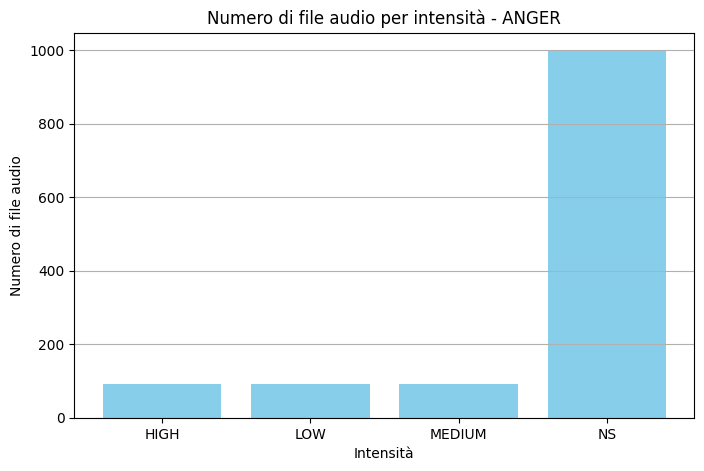

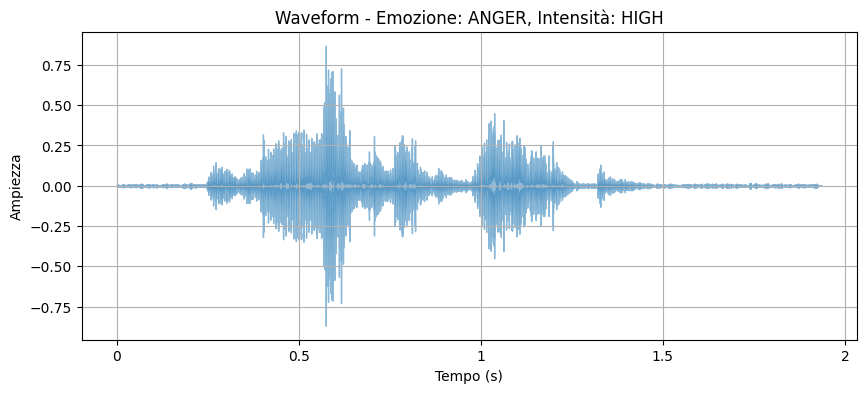

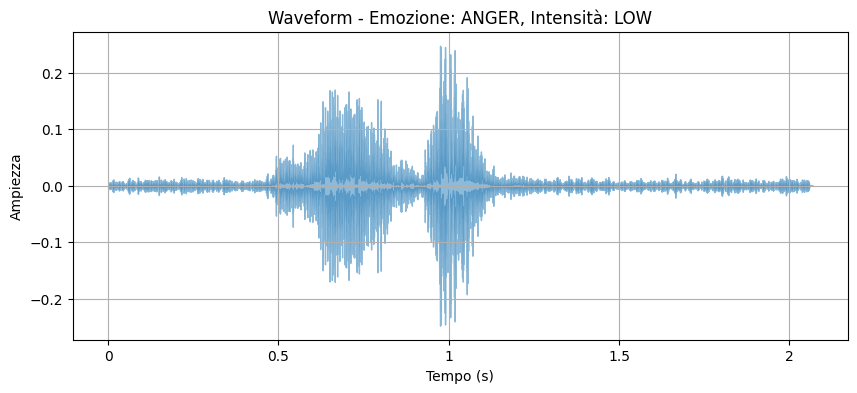

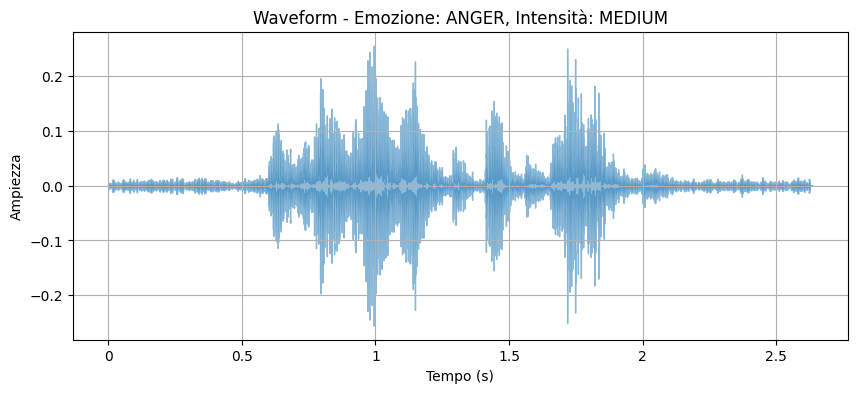

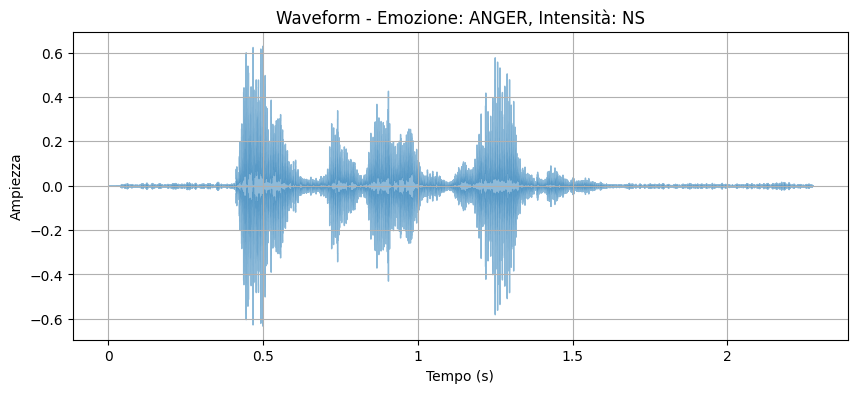

Emozione: DISGUST
  Intensità: HIGH - Numero di file audio: 91
  Intensità: LOW - Numero di file audio: 91
  Intensità: MEDIUM - Numero di file audio: 91
  Intensità: NS - Numero di file audio: 998


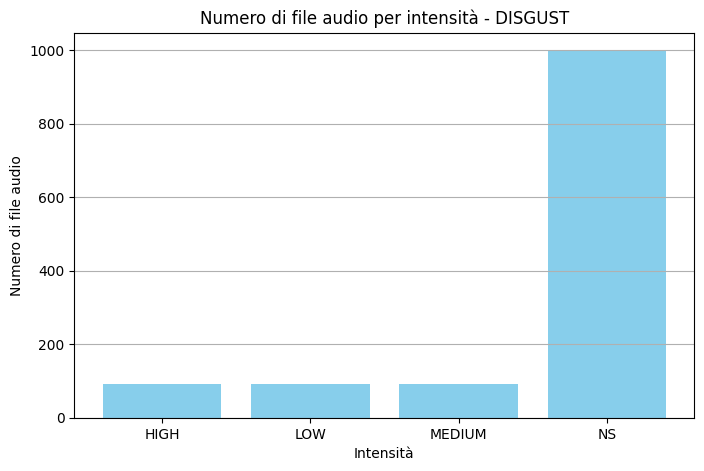

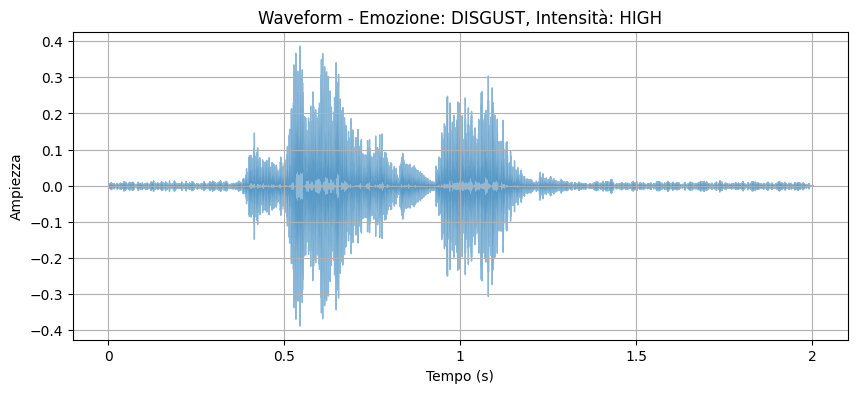

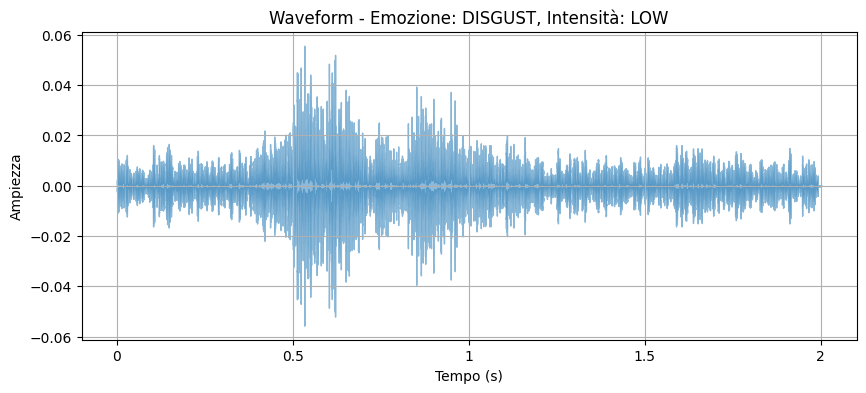

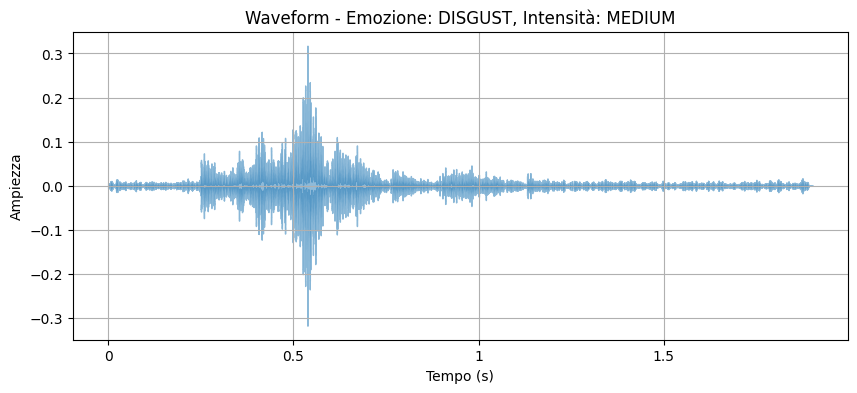

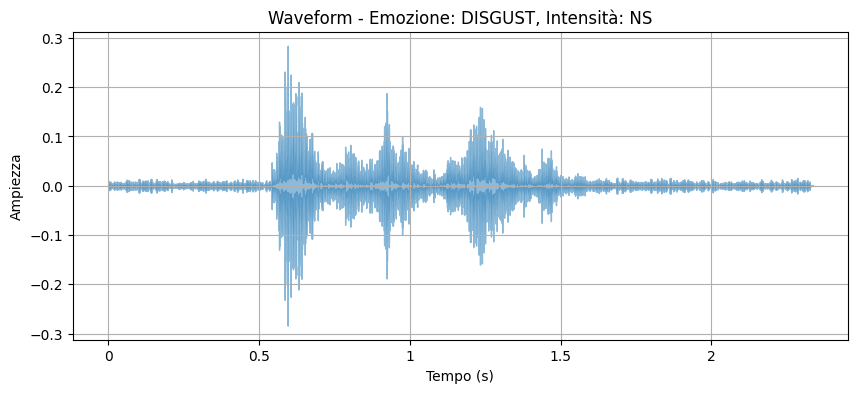

Emozione: FEAR
  Intensità: HIGH - Numero di file audio: 91
  Intensità: LOW - Numero di file audio: 91
  Intensità: MEDIUM - Numero di file audio: 91
  Intensità: NS - Numero di file audio: 998


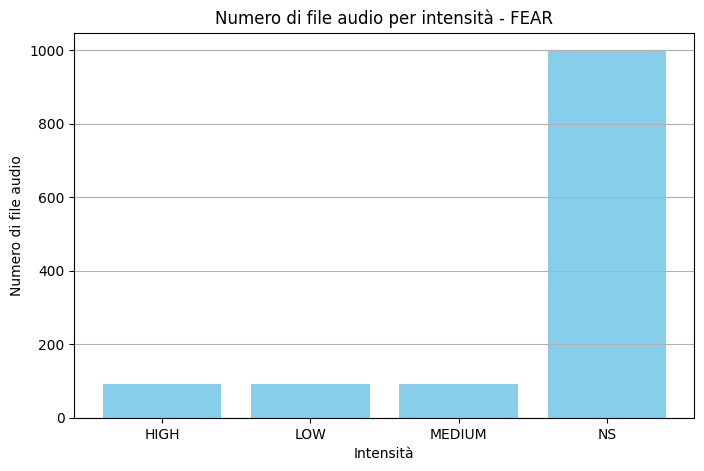

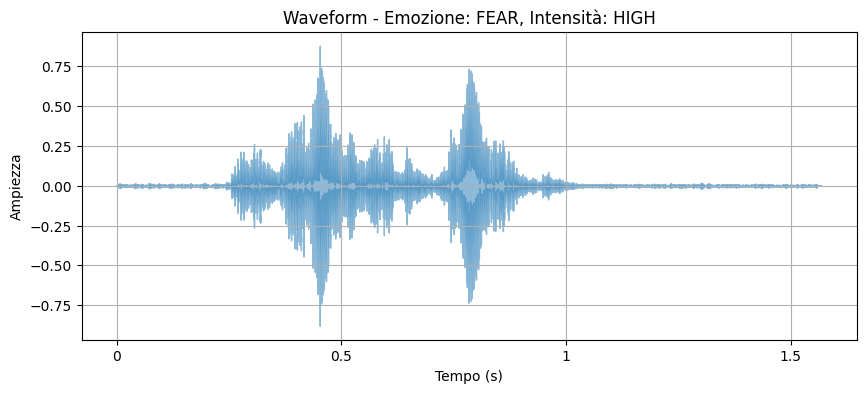

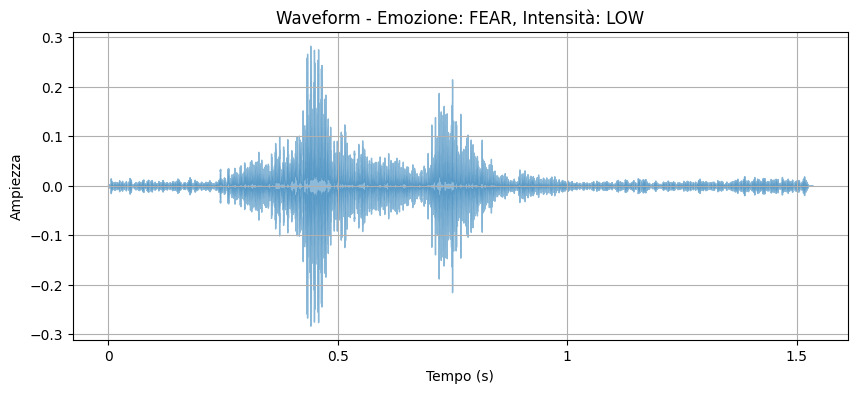

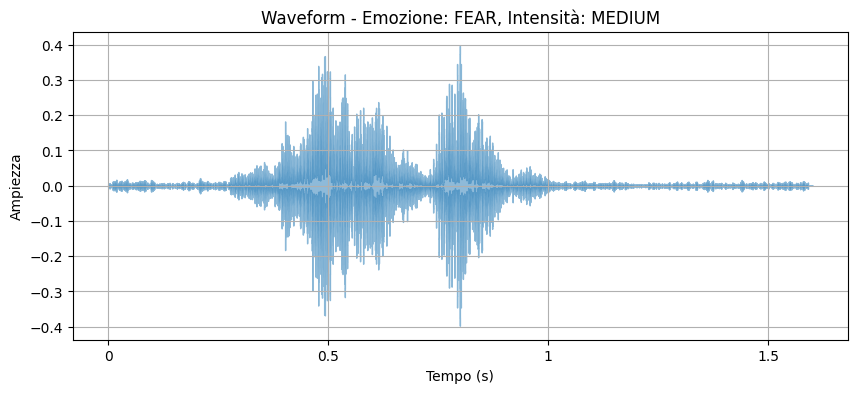

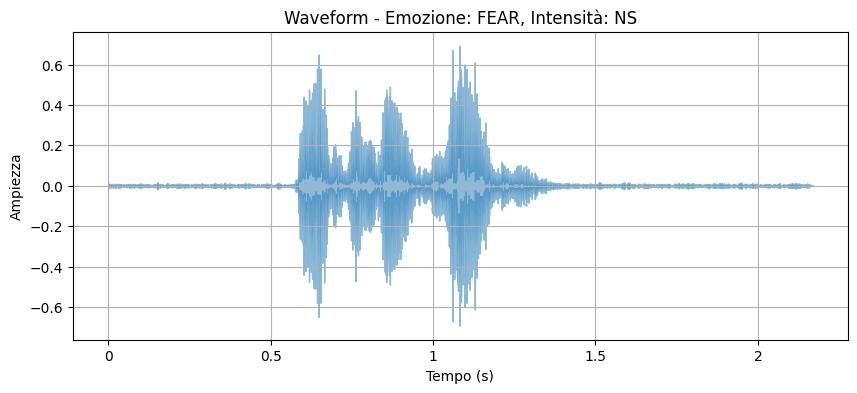

Emozione: HAPPINESS
  Intensità: HIGH - Numero di file audio: 91
  Intensità: LOW - Numero di file audio: 91
  Intensità: MEDIUM - Numero di file audio: 91
  Intensità: NS - Numero di file audio: 998


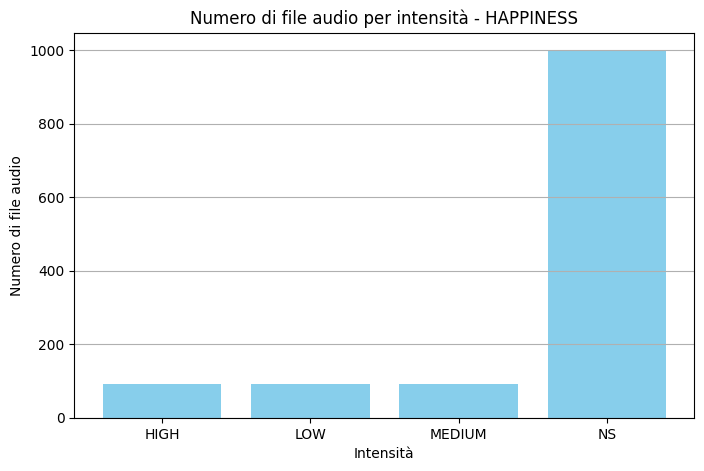

In [ ]:
# Itera su ogni emozione e stampa le cartelle di intensità e il numero di file audio in ciascuna

for emotion in emotion_labels:
    print(f"Emozione: {emotion}")
    intensities = []
    file_counts = []
    intensity_folders = sorted(os.listdir(os.path.join(dataset_path, emotion)))

    for intensity in intensity_folders:
        intensity_path = os.path.join(dataset_path, emotion, intensity)
        if os.path.exists(intensity_path) and os.listdir(intensity_path):
            num_files = len([file for file in os.listdir(intensity_path) if os.path.isfile(os.path.join(intensity_path, file))])-1
        else:
            num_files = 0
        print(f"  Intensità: {intensity} - Numero di file audio: {num_files}")
        intensities.append(intensity)
        file_counts.append(num_files)

    # Creazione del grafico a barre
    plt.figure(figsize=(8, 5))
    plt.bar(intensities, file_counts, color='skyblue')
    plt.title(f'Numero di file audio per intensità - {emotion}')
    plt.xlabel('Intensità')
    plt.ylabel('Numero di file audio')
    plt.grid(axis='y')
    plt.show()

    # Visualizzazione delle waveforms
    for intensity in intensity_folders:
        intensity_path = os.path.join(dataset_path, emotion, intensity)

        # Trova il primo file audio di esempio
        example_file = next((file for file in os.listdir(intensity_path) if file.endswith('.wav')), None)
        if example_file:
            example_file_path = os.path.join(intensity_path, example_file)

            # Carica e visualizza la waveform
            audio, sample_rate = librosa.load(example_file_path, sr=None)
            plt.figure(figsize=(10, 4))
            librosa.display.waveshow(audio, sr=sample_rate, alpha=0.5)
            plt.title(f'Waveform - Emozione: {emotion}, Intensità: {intensity}')
            plt.xlabel('Tempo (s)')
            plt.ylabel('Ampiezza')
            plt.grid()
            plt.show()